In [1]:
import os

try:
    has_changed_dir
except:
    has_changed_dir = False

try:
    import google.colab
    IN_COLAB = True
    print("Running as a Colab notebook")
except:
    IN_COLAB = False

if IN_COLAB:
    %pip install datasets
    %pip install translate-toolkit
    #%pip install bitsandbytes

    !git clone https://github.com/MartinKirkegaardDK/KDS_MI.git

    if not has_changed_dir:
        os.chdir('KDS_MI/refactor')
        has_changed_dir = True
else:
    if not has_changed_dir:
        os.chdir('.')
        has_changed_dir = True

In [2]:
%load_ext autoreload
%autoreload 2

In [5]:
from make_steering_vectors import main

In [7]:
main(
    model_url='EleutherAI/pythia-14m',
    target_language='da',
    complement_languages=['en', 'sv', 'is', 'nb'],
    device='cpu',
    out_folder='steering_vectors'
)

 32%|███▏      | 6/19 [00:12<00:26,  2.03s/it]


In [8]:
from utils.hooking import HookManager
from utils.compatibility import *
from utils.data import load_steering_vector, load_bible_data

from transformers import AutoModelForCausalLM, AutoTokenizer
from steering_loss import plot_loss_for_steering_vectors

In [6]:
model_url='EleutherAI/pythia-14m'
device = 'cpu'

model = AutoModelForCausalLM.from_pretrained(model_url).to(device)
tokenizer = AutoTokenizer.from_pretrained(model_url)

In [9]:
ds = load_bible_data('en', 'da')

51it [02:35,  3.05s/it]


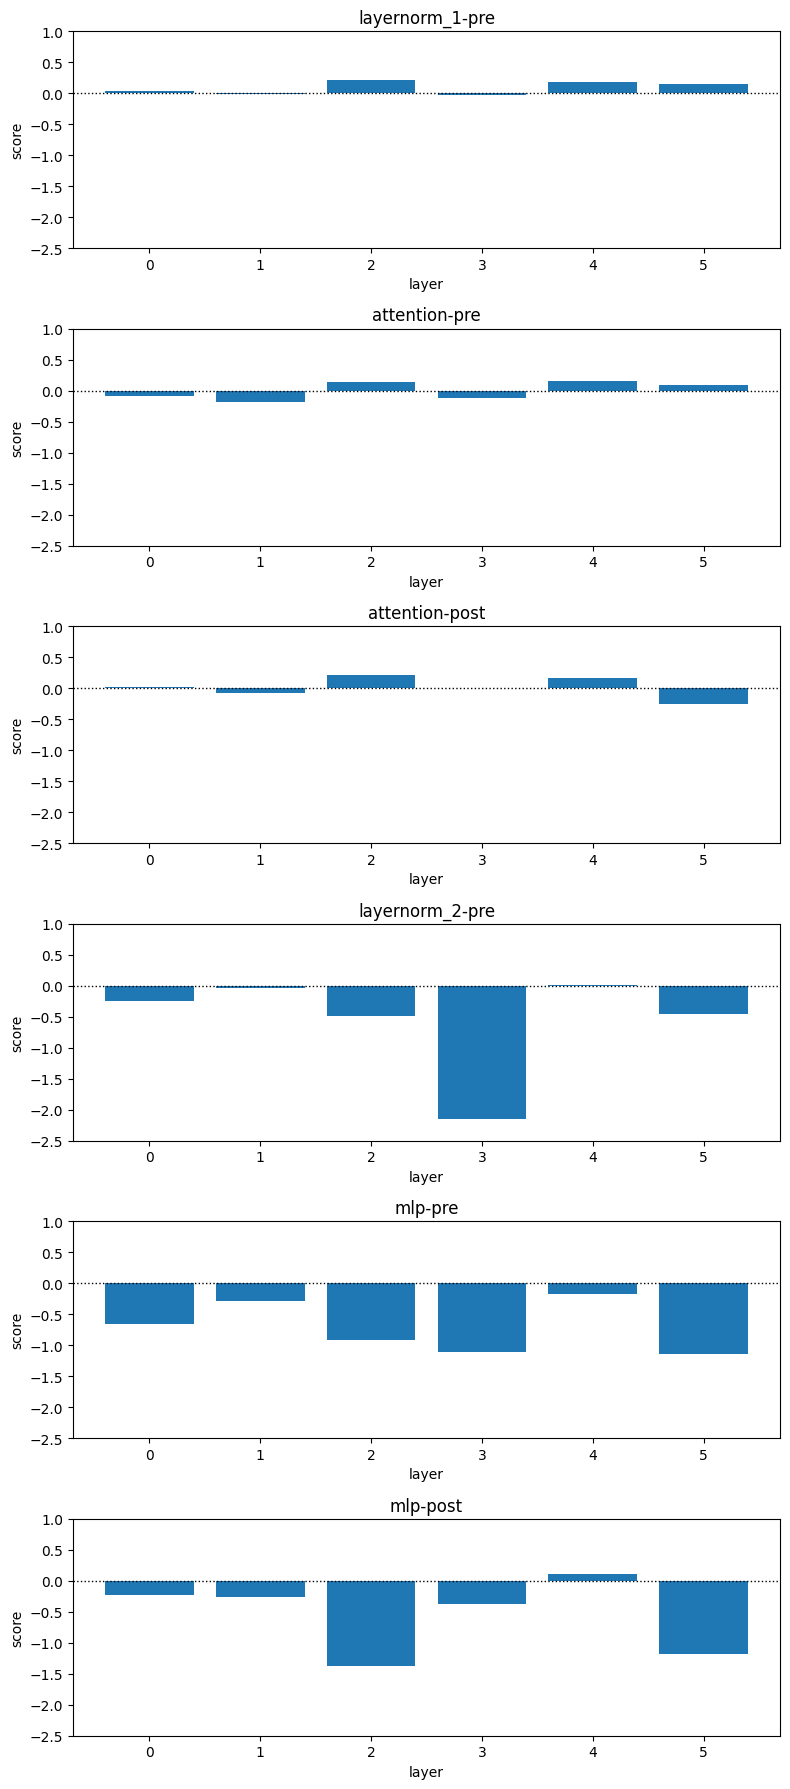

In [13]:
plot_loss_for_steering_vectors(
    model,
    tokenizer,
    ds,
    5,
    'en',
    'da',
    50,
)